In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_univariate_df = pd.read_csv('covid_univariate_df.csv')
covid_univariate_df['Date'] = pd.to_datetime(covid_univariate_df['Date'])
covid_univariate_df = covid_univariate_df.set_index('Date')
covid_univariate_df.index = pd.to_datetime(covid_univariate_df.index)
covid_univariate_df

,STATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,,
2020-01-21,39,0
2020-01-21,17,0
2020-01-21,48,0
2020-01-21,39,0
2020-01-21,36,0
...,...,...
2022-04-29,37,0
2022-04-29,12,0
2022-04-29,37,0


## 1. Temporal Visualizations:

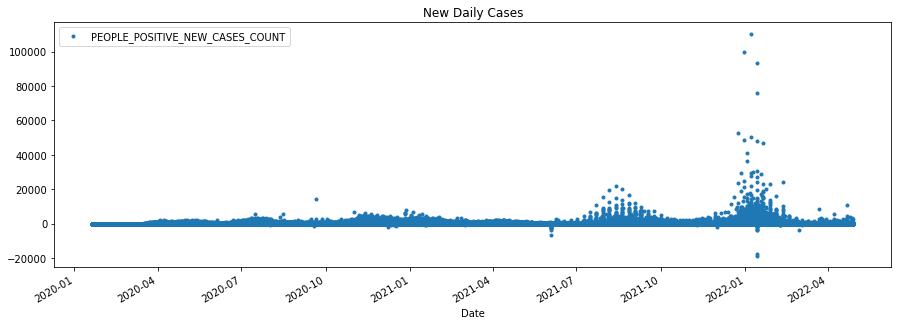

In [3]:
covid_univariate_df_no_state = covid_univariate_df.drop('STATE', axis=1)

covid_univariate_df_no_state.plot(style='.',
        figsize=(15, 5),
        title='New Daily Cases')
plt.show()

<AxesSubplot:xlabel='Date'>

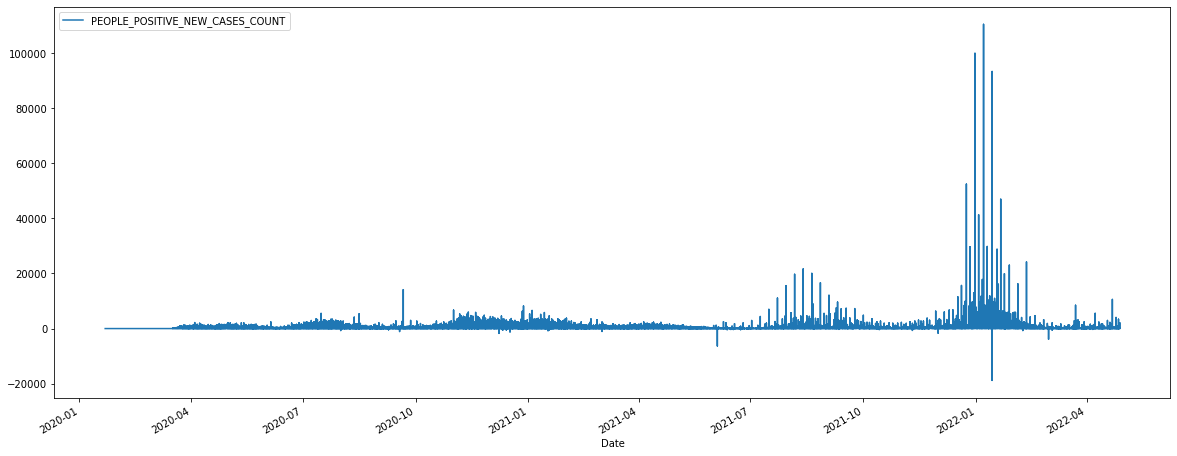

In [4]:
covid_univariate_df_no_state.loc[(covid_univariate_df_no_state.index > "2020-01-21") & (covid_univariate_df_no_state.index < "2022-04-29")].plot(figsize=(20,8))

<AxesSubplot:ylabel='Count'>

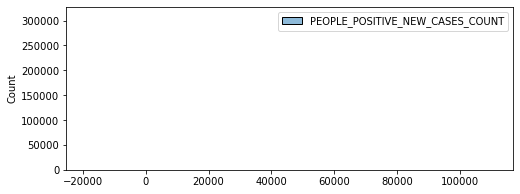

In [5]:
plt.figure(figsize=(8, 3))
sns.histplot(covid_univariate_df_no_state, kde=False)

<AxesSubplot:>

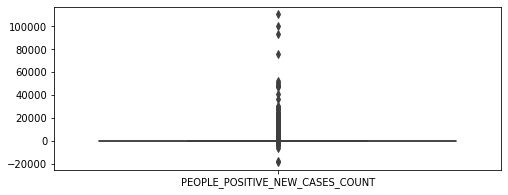

In [6]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=covid_univariate_df_no_state)

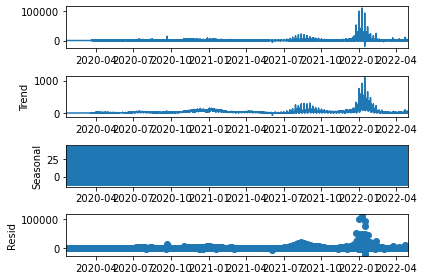

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(covid_univariate_df_no_state, period=365).plot()

plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

X = covid_univariate_df_no_state.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])

MemoryError: Unable to allocate 712. MiB for an array with shape (811023, 115) and data type float64